In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\DSData-master\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


We will drop Loan_ID column,as there is unique values present.

In [8]:
df.drop('Loan_ID', axis=1,inplace=True)

In [9]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
print('Total Duplicates Rows are ',df.duplicated().sum())

Total Duplicates Rows are  0


In [11]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [15]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [17]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


1) The counts of all columns are same.

2) The mean > median(50%) in ApplicantIncome,CoapplicantIncome,LoanAmount which means data is skewed to right.

3) The mean < median(50%) in Loan_Amount_Term which means data is skewed to left.

4) There is outliers in Applicant_Income,CoapplicantIncome,LoanAmount,Loan_Amount_Term in this columns.

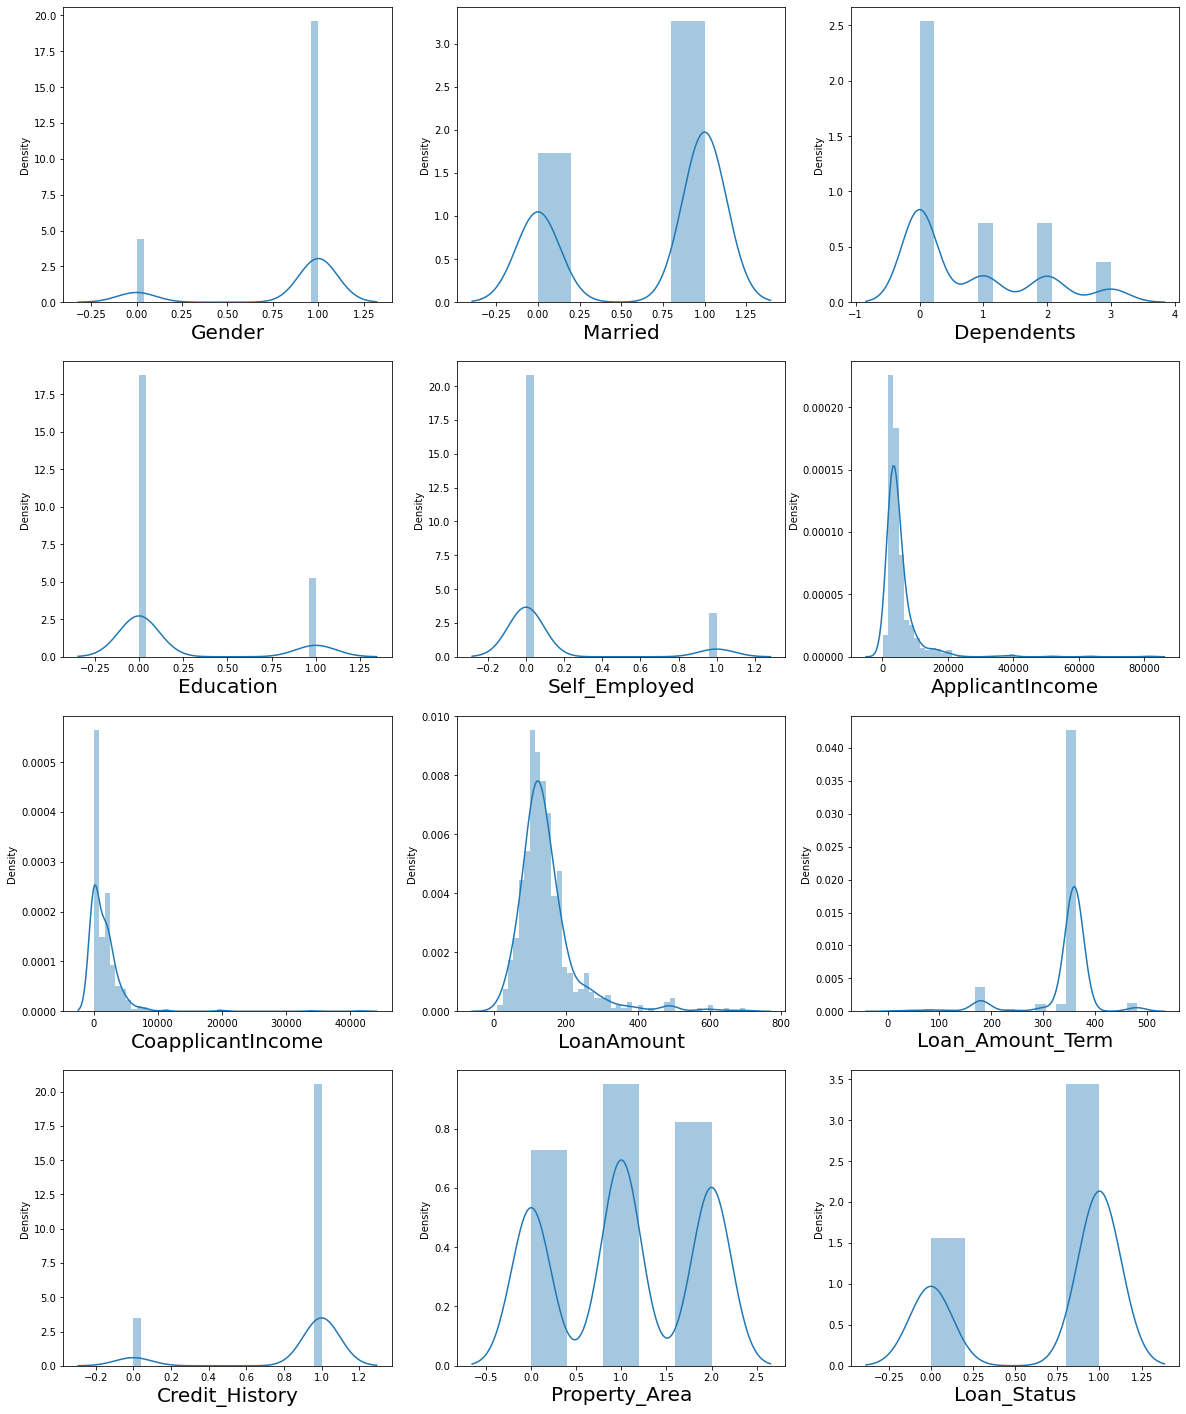

In [18]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

From this distplot we can say that ApplicantIncome,CoapplicantIncome data is skewed to right and Loan_Amount_Term data is skewed to left and rest looks normal.

1.0    502
0.0    112
Name: Gender, dtype: int64


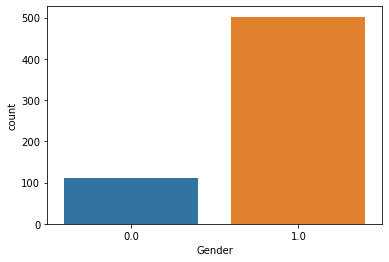

In [19]:
ax= sns.countplot(x='Gender', data=df)
print(df['Gender'].value_counts())

THe counts of Gender Male is higher than Female.

1.0    401
0.0    213
Name: Married, dtype: int64


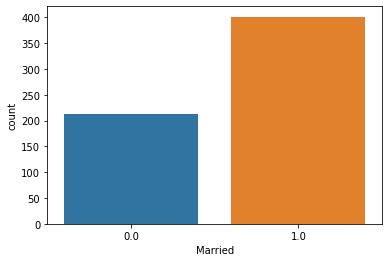

In [20]:
ax= sns.countplot(x='Married', data=df)
print(df['Married'].value_counts())

The counts of Married Yes is higher than No.

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64


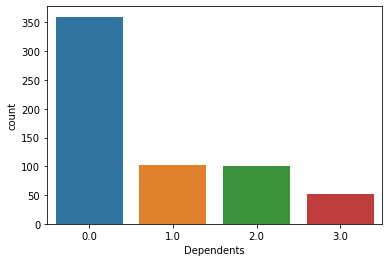

In [21]:
ax= sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

0.0    480
1.0    134
Name: Education, dtype: int64


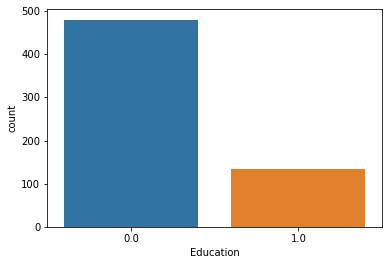

In [22]:
ax= sns.countplot(x='Education', data=df)
print(df['Education'].value_counts())

The count of Education Graduate is higher than Non_Graduate

0.0    532
1.0     82
Name: Self_Employed, dtype: int64


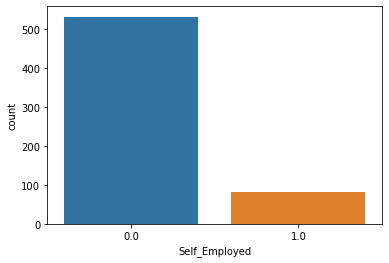

In [23]:
ax= sns.countplot(x='Self_Employed', data=df)
print(df['Self_Employed'].value_counts())

The counts of Self_Employed No is higher than Yes.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


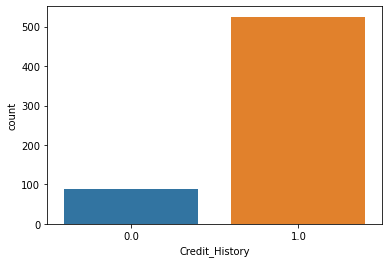

In [24]:
ax= sns.countplot(x='Credit_History', data=df)
print(df['Credit_History'].value_counts())

1.0    233
2.0    202
0.0    179
Name: Property_Area, dtype: int64


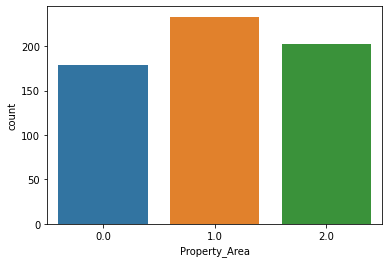

In [25]:
ax= sns.countplot(x='Property_Area', data=df)
print(df['Property_Area'].value_counts())

The counts of Property_Area Semi-Urban is higher than others.

1.0    422
0.0    192
Name: Loan_Status, dtype: int64


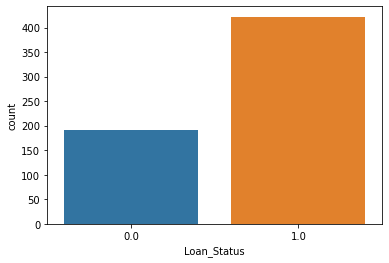

In [26]:
ax= sns.countplot(x='Loan_Status', data=df)
print(df['Loan_Status'].value_counts())

The count of Loan_Status Yes is higher than No.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

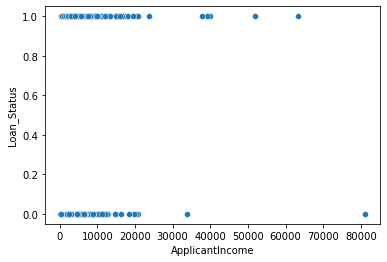

In [27]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

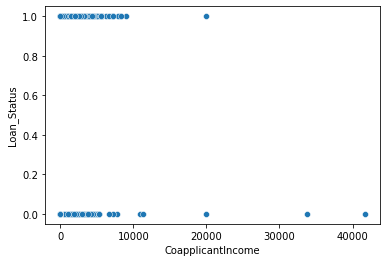

In [28]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

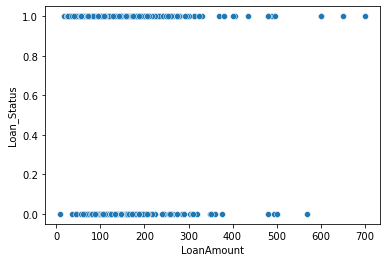

In [29]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=df)

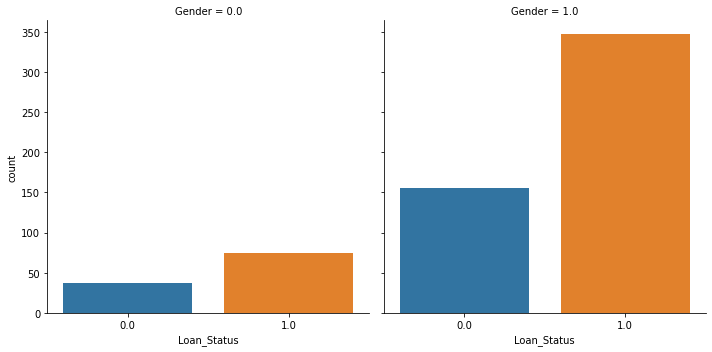

In [30]:
sns.catplot(x='Loan_Status', col='Gender', data=df, kind='count')

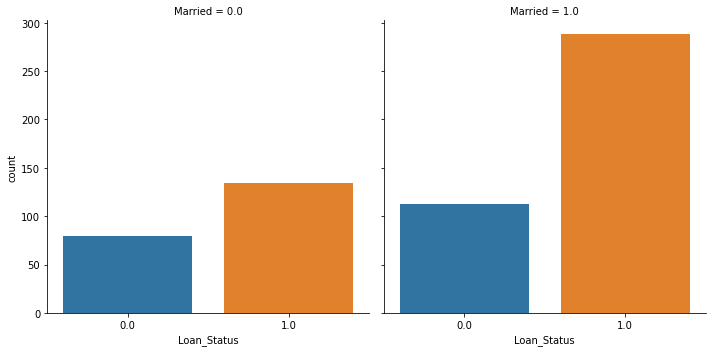

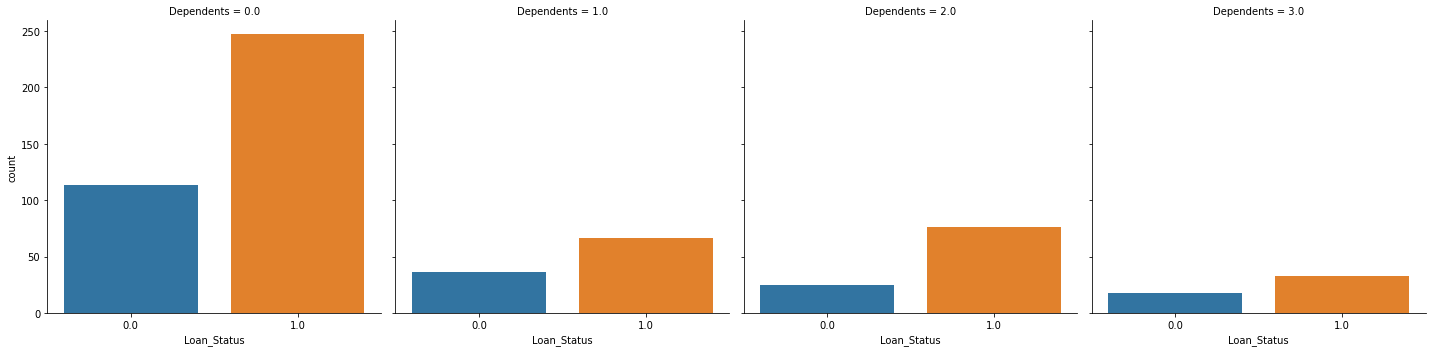

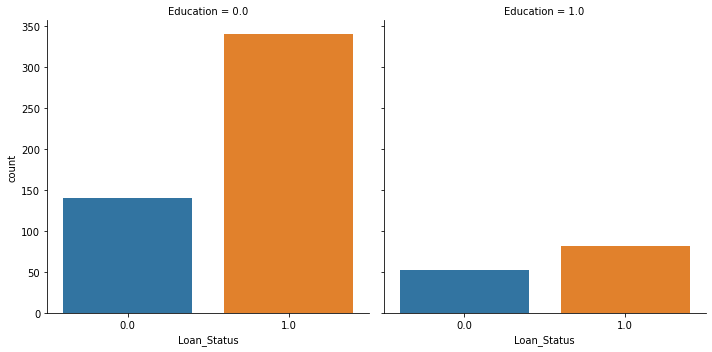

In [31]:
sns.catplot(x='Loan_Status', col='Married', data=df, kind='count')

sns.catplot(x='Loan_Status', col='Dependents', data=df, kind='count')

sns.catplot(x='Loan_Status', col='Education', data=df, kind='count')

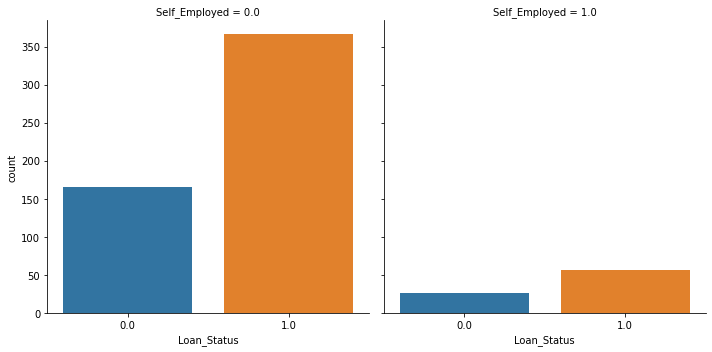

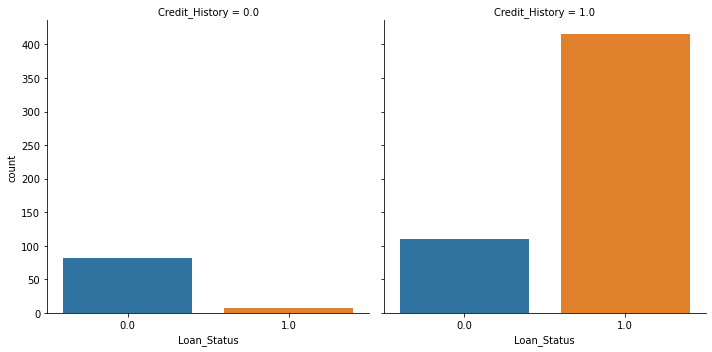

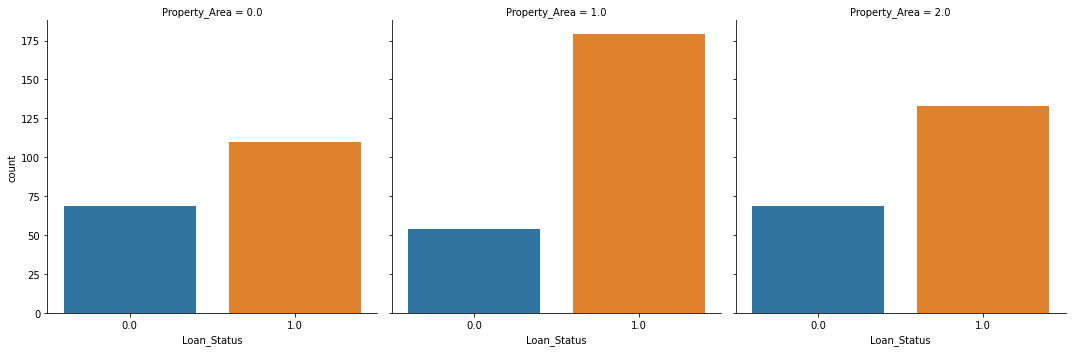

In [32]:
sns.catplot(x='Loan_Status', col='Self_Employed', data=df, kind='count')

sns.catplot(x='Loan_Status', col='Credit_History', data=df, kind='count')

sns.catplot(x='Loan_Status', col='Property_Area', data=df, kind='count')


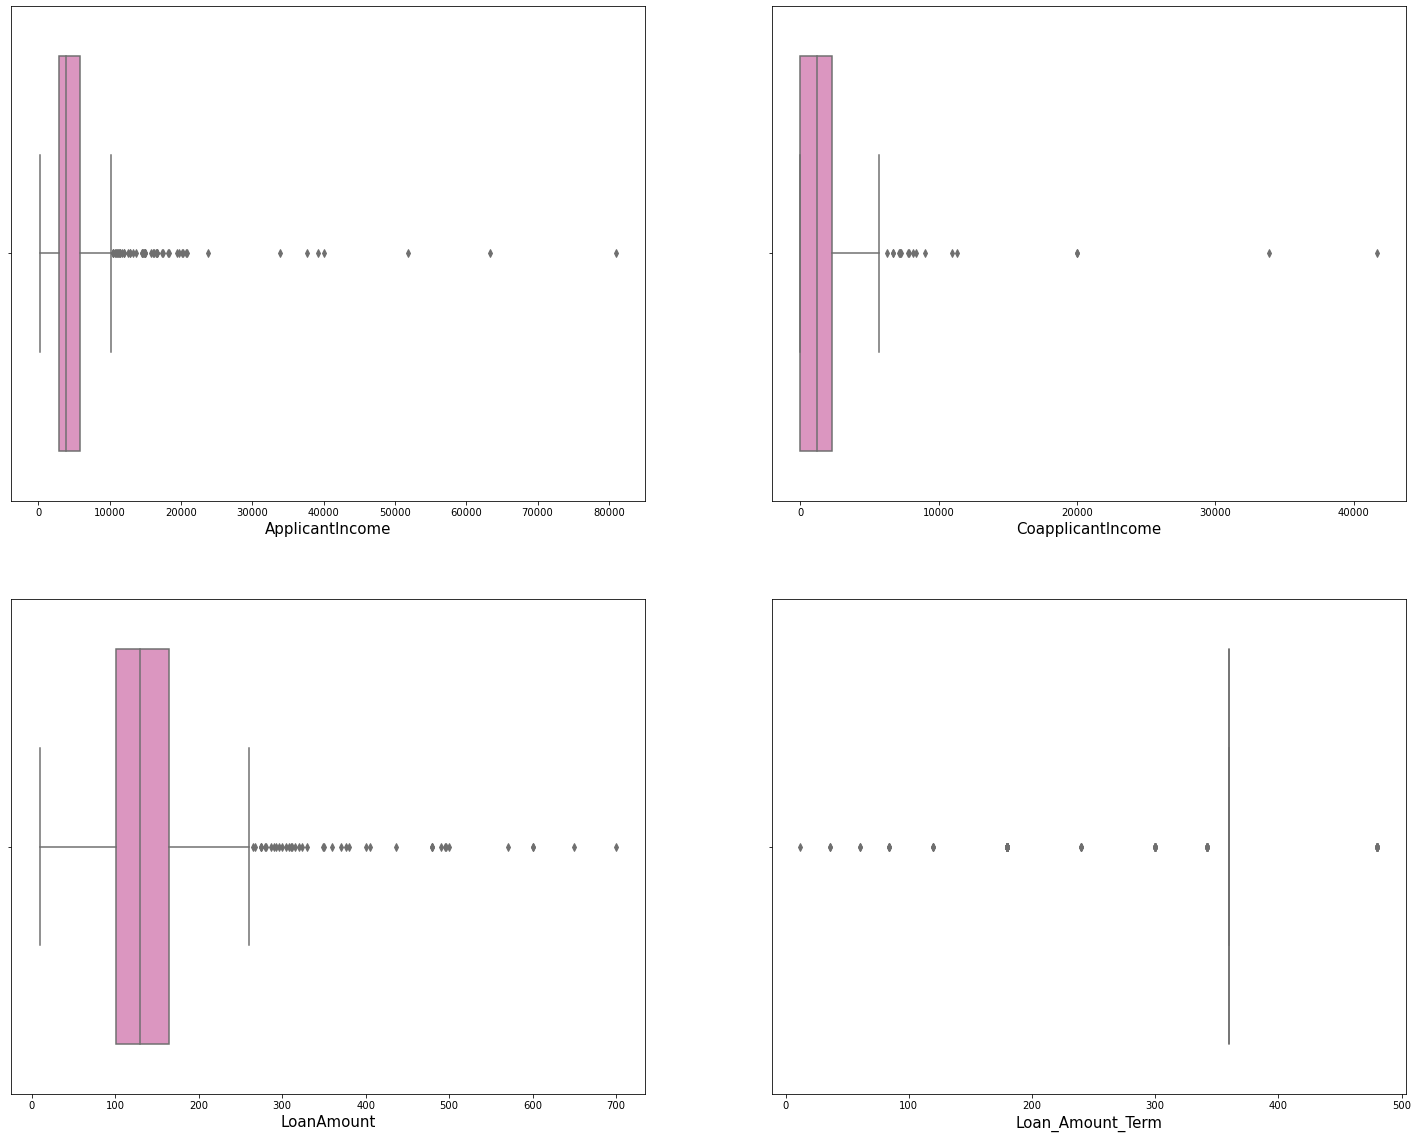

In [33]:
plt.figure(figsize=(25,20), facecolor = 'white')
plotnumber=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.show()

There is outliers in ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term.

In [34]:
from scipy.stats import zscore
out_features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(out_features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.000000,0.279851
1,0.134412,0.038732,0.219273,0.279851
2,0.393747,0.554487,0.957641,0.279851
3,0.462062,0.251980,0.314547,0.279851
4,0.097728,0.554487,0.064454,0.279851
...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851
610,0.212557,0.554487,1.267279,2.518655
611,0.437174,0.472404,1.269371,0.279851
612,0.357064,0.554487,0.483367,0.279851


In [35]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [36]:
df_1 = df[(z<3).all(axis=1)]
df_1.shape

(577, 12)

In [37]:
print('OLd Data Frame- ',df.shape[0])
print('New Data Frame- ',df_1.shape[0])

OLd Data Frame-  614
New Data Frame-  577


In [38]:
print('Data Loss Percentage- ',((df.shape[0] - df_1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  6.026058631921824


In [39]:
df = df_1

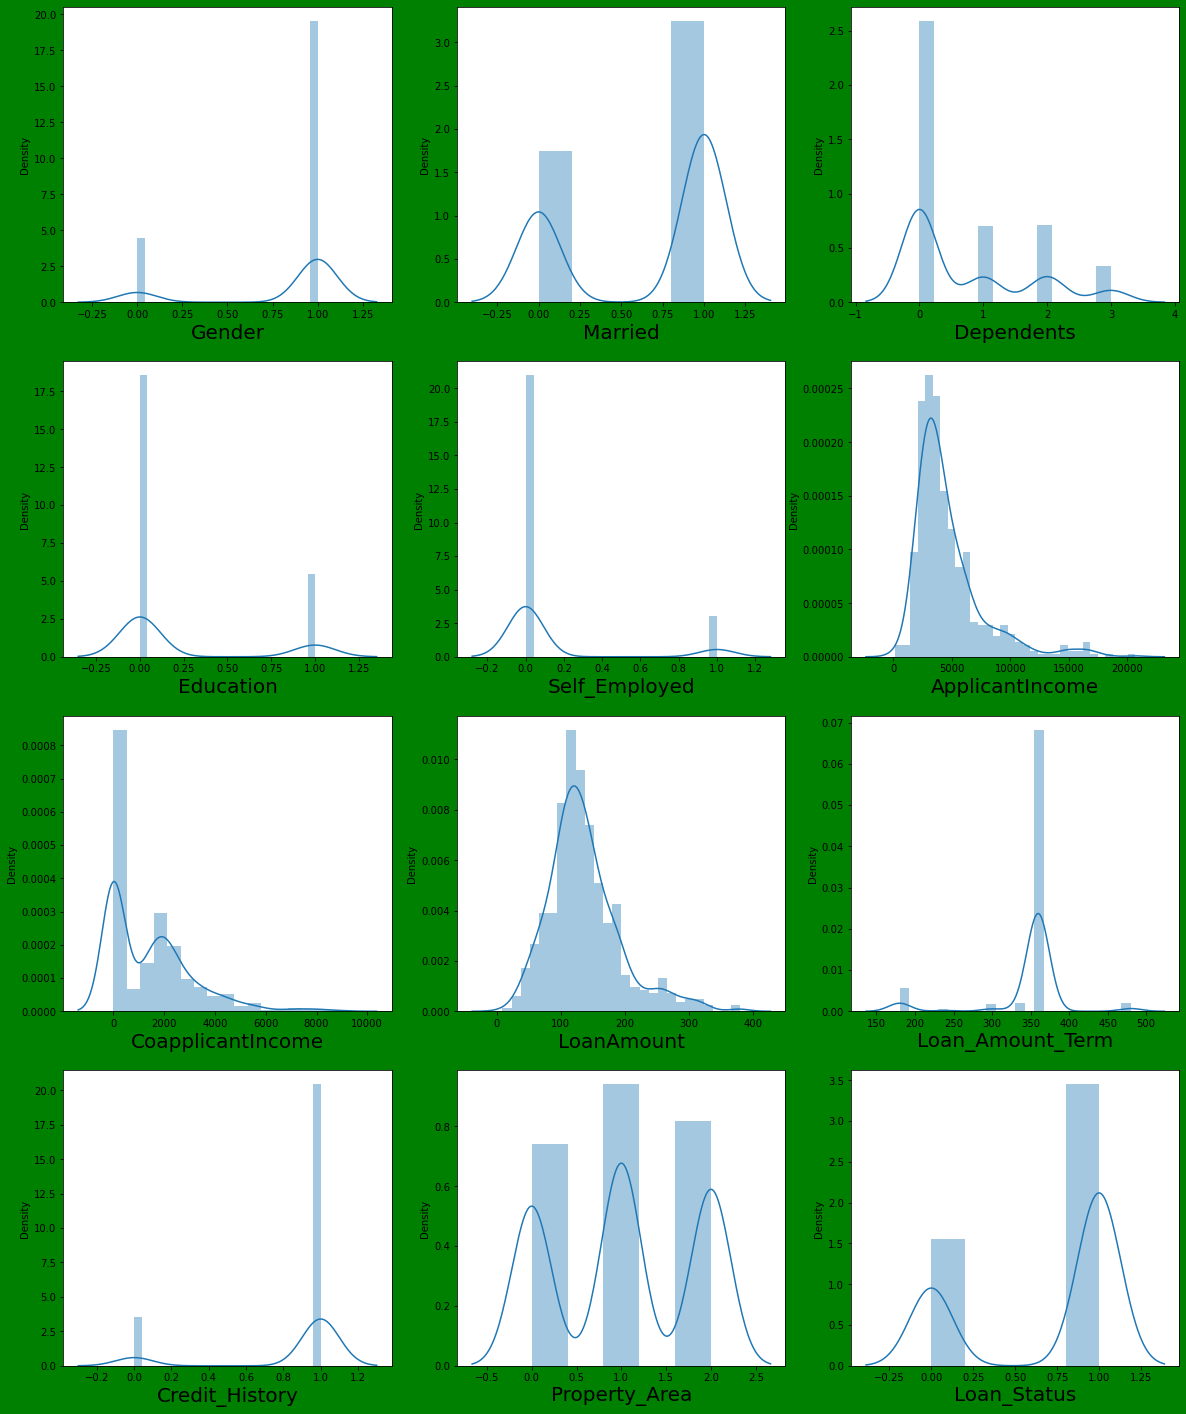

In [40]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

Now data looks nomal in all columns.

In [41]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We will not remove outliers and skewness from categoical data.

We have skewness in ApplicantIncome,CoaapplicantIncome,LoanAmount,Loan_Amount_Term columns.

In [42]:
df['ApplicantIncome'] =np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome'] =np.cbrt(df['CoapplicantIncome'])
df['LoanAmount'] =np.cbrt(df['LoanAmount'])
df['Loan_Amount_Term'] =np.cbrt(df['Loan_Amount_Term'])

In [43]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.557136
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We have reduced skewness in ApplicantIncome,CoapplicantIncome,LoanAmount columns but having skewness in Loan_Amount_Term.

In [44]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.049555,0.230714,0.173387,-0.104142,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.018391,0.320626,0.182267,-0.124329,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.100853,-0.006521,0.131665,-0.084528,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.178728,0.030281,-0.125819,-0.099780,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.230846,-0.078584,0.117411,-0.026855,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.049555,-0.018391,0.100853,-0.178728,0.230846,1.000000,-0.343626,0.441357,-0.057324,0.033597,-0.012177,-0.004722
CoapplicantIncome,0.230714,0.320626,-0.006521,0.030281,-0.078584,-0.343626,1.000000,0.228319,-0.013641,0.001735,-0.081866,0.071908
LoanAmount,0.173387,0.182267,0.131665,-0.125819,0.117411,0.441357,0.228319,1.000000,0.054975,-0.004712,-0.094665,-0.028730
Loan_Amount_Term,-0.104142,-0.124329,-0.084528,-0.099780,-0.026855,-0.057324,-0.013641,0.054975,1.000000,0.039810,-0.064844,-0.008652
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.033597,0.001735,-0.004712,0.039810,1.000000,-0.008121,0.560936


<AxesSubplot:>

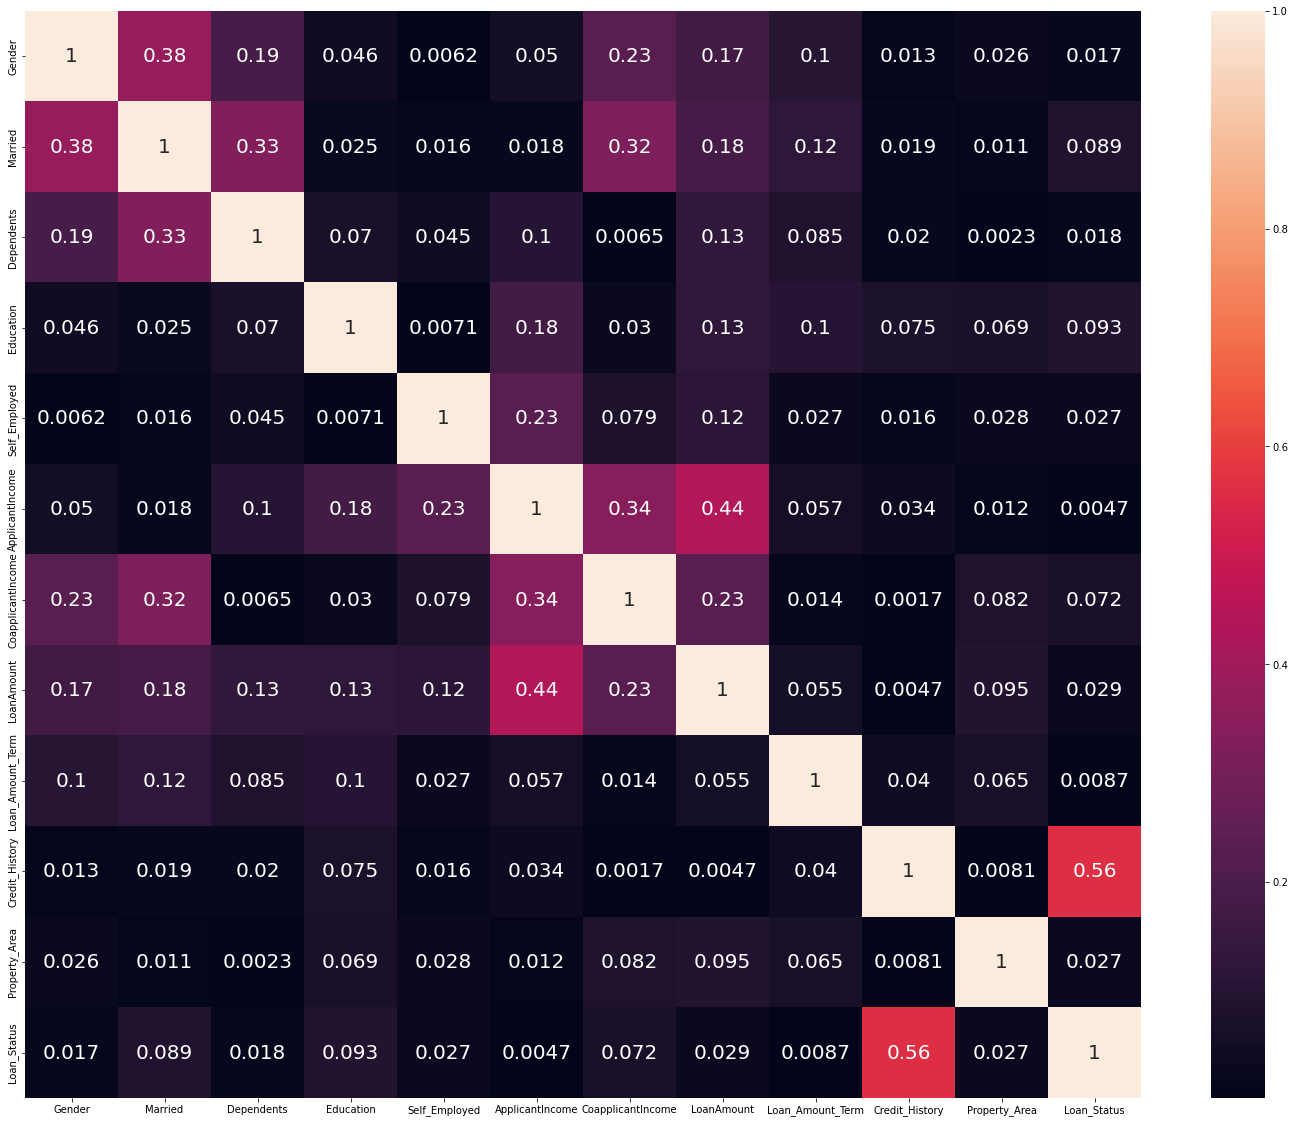

In [45]:
df_corr = df.corr().abs()
plt.figure(figsize=(25,20))
sns.heatmap(df_corr,annot=True,annot_kws={'size':20})

From this heatmap we can say that there is no features has high collinearity with others.

## Correlation between label and features

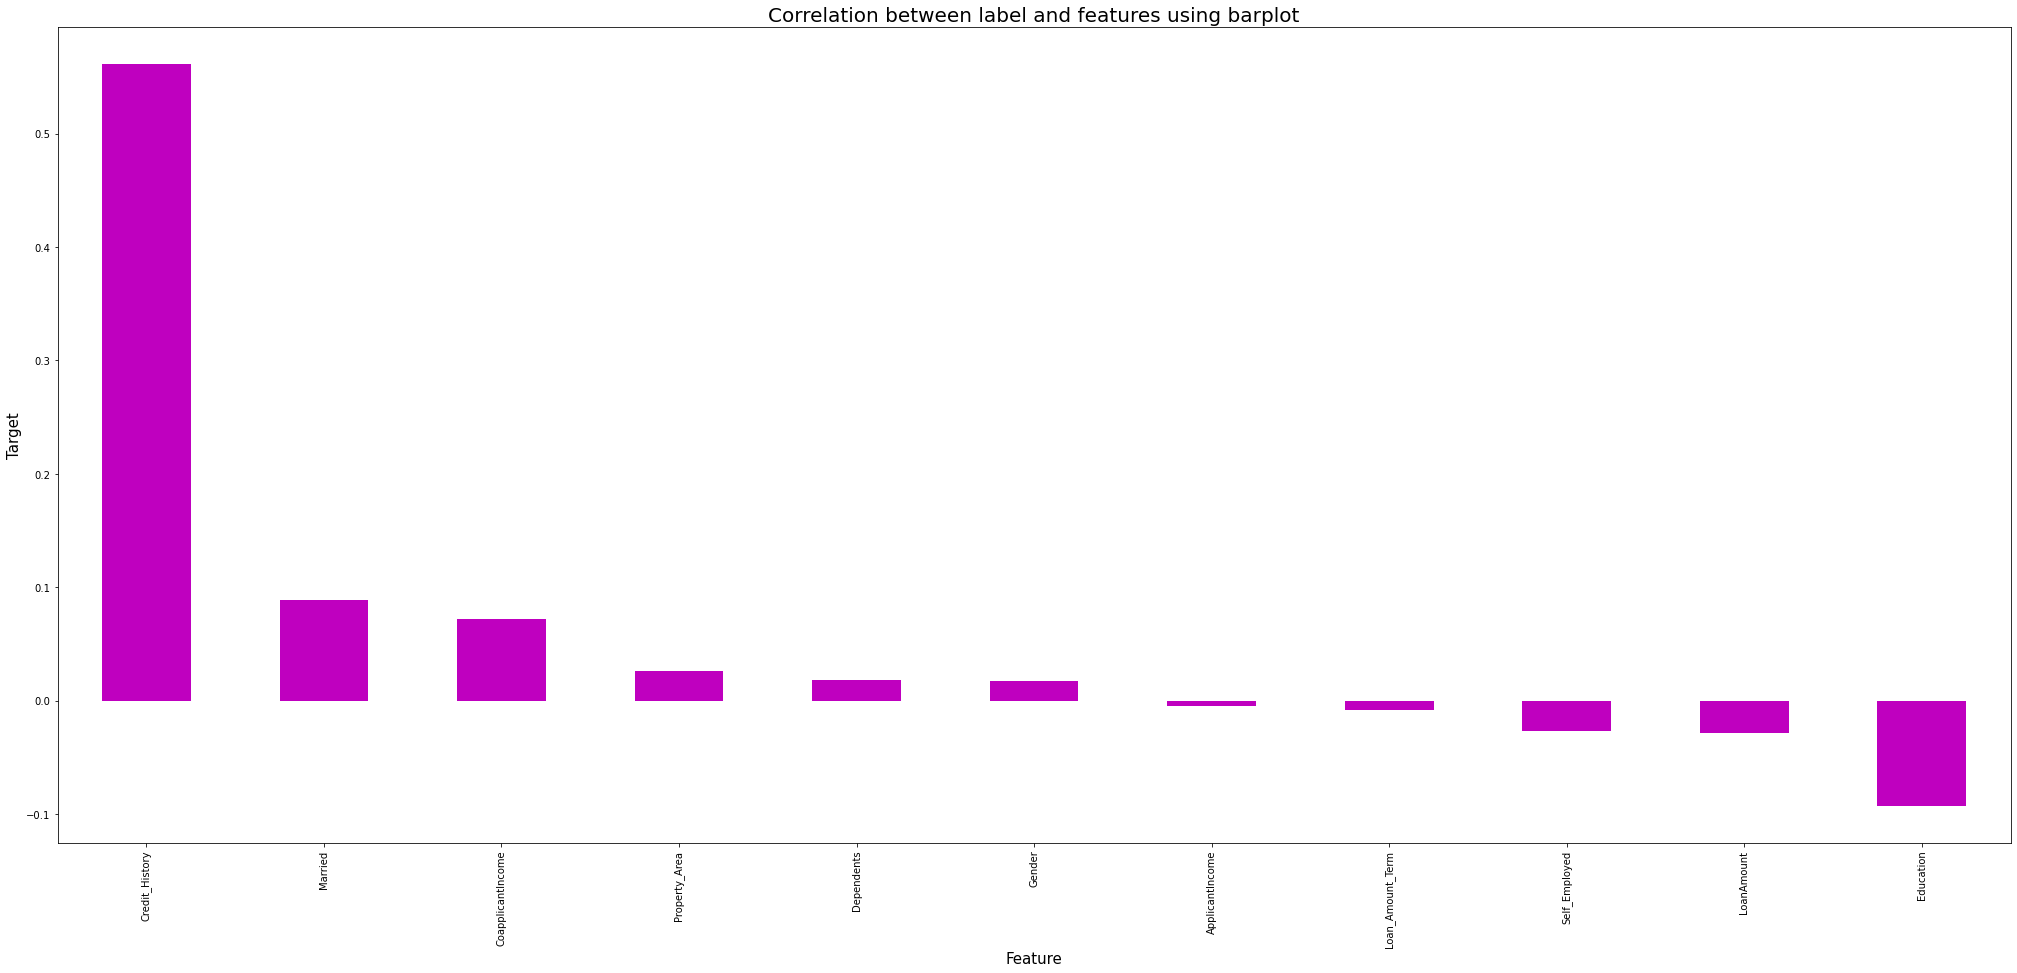

In [46]:
plt.figure(figsize=(35,15))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From this barplot we can say that ApplicantIncome,Loan_Amount_Term has very less correlation with Target column.

## Separating Features and Label

In [47]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.258681,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.258681,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.258681,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.258681,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.258681,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.620151,-1.093504,-1.302297,0.258681,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.040329,-1.093504,-2.336409,-3.363963,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.298514,-0.177556,1.830577,0.258681,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.161699,-1.093504,0.960923,0.258681,0.418513,1.227472


## VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.219387,Gender
1,1.401965,Married
2,1.170835,Dependents
3,1.072565,Education
4,1.060625,Self_Employed
5,1.801687,ApplicantIncome
6,1.600244,CoapplicantIncome
7,1.618505,LoanAmount
8,1.059918,Loan_Amount_Term
9,1.010917,Credit_History


There is no multicollinearity issue is there is in all columns vif values is less than 10.

We can go for Model Building.

In [52]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

Here we can see data is not balanced,since it is a classification problem we will balance the data using oversampling method

In [53]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [54]:
y.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

Now the data is imbalanced .Now we can build machine learning classification models.

## Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=320)

In [57]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [58]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8075313807531381
[[ 76  30]
 [ 16 117]]
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       106
         1.0       0.80      0.88      0.84       133

    accuracy                           0.81       239
   macro avg       0.81      0.80      0.80       239
weighted avg       0.81      0.81      0.81       239



In [59]:
LR =LogisticRegression()
LR.fit(x_train,y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7196652719665272
[[ 58  48]
 [ 19 114]]
              precision    recall  f1-score   support

         0.0       0.75      0.55      0.63       106
         1.0       0.70      0.86      0.77       133

    accuracy                           0.72       239
   macro avg       0.73      0.70      0.70       239
weighted avg       0.73      0.72      0.71       239



In [60]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7615062761506276
[[ 71  35]
 [ 22 111]]
              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71       106
         1.0       0.76      0.83      0.80       133

    accuracy                           0.76       239
   macro avg       0.76      0.75      0.75       239
weighted avg       0.76      0.76      0.76       239



In [61]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7824267782426778
[[ 73  33]
 [ 19 114]]
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74       106
         1.0       0.78      0.86      0.81       133

    accuracy                           0.78       239
   macro avg       0.78      0.77      0.78       239
weighted avg       0.78      0.78      0.78       239



In [62]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7364016736401674
[[ 72  34]
 [ 29 104]]
              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70       106
         1.0       0.75      0.78      0.77       133

    accuracy                           0.74       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.74      0.74      0.74       239



In [63]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7824267782426778
[[ 81  25]
 [ 27 106]]
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       106
         1.0       0.81      0.80      0.80       133

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



In [64]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8410041841004184
[[ 84  22]
 [ 16 117]]
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       106
         1.0       0.84      0.88      0.86       133

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



In [65]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.7196652719665272
[[76 30]
 [37 96]]
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69       106
         1.0       0.76      0.72      0.74       133

    accuracy                           0.72       239
   macro avg       0.72      0.72      0.72       239
weighted avg       0.72      0.72      0.72       239



## Cross Validation Score

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
score1=cross_val_score(RFC,x,y)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC) - score1.mean())

[0.75625    0.78616352 0.89937107 0.89937107 0.88050314]
0.8443317610062893
Difference between Accuracy score and cross validation score is -  -0.03680038025315113


In [68]:
score2=cross_val_score(LR,x,y)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predLR) - score2.mean())

[0.6875     0.71069182 0.74842767 0.72955975 0.71698113]
0.718632075471698
Difference between Accuracy score and cross validation score is -  0.0010331964948291361


In [69]:
score3=cross_val_score(GB,x,y)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predGB) - score3.mean())

[0.7125     0.72327044 0.8490566  0.86792453 0.78616352]
0.7877830188679245
Difference between Accuracy score and cross validation score is -  -0.005356240625246644


In [70]:
score4=cross_val_score(svc,x,y)
print(score4)
print(score4.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predGB) - score4.mean())

[0.71875    0.73584906 0.79874214 0.77358491 0.74213836]
0.753812893081761
Difference between Accuracy score and cross validation score is -  0.028613885160916785


In [71]:
score5=cross_val_score(ABC,x,y)
print(score5)
print(score5.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predABC) - score5.mean())

[0.6875     0.70440252 0.77987421 0.83018868 0.76100629]
0.7525943396226414
Difference between Accuracy score and cross validation score is -  -0.01619266598247404


In [72]:
score6=cross_val_score(BC,x,y)
print(score6)
print(score6.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predBC) - score6.mean())

[0.73125    0.81132075 0.8490566  0.85534591 0.82389937]
0.8141745283018867
Difference between Accuracy score and cross validation score is -  -0.031747750059208935


In [73]:
score7=cross_val_score(ET,x,y)
print(score7)
print(score7.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predET) - score7.mean())

[0.78125    0.83647799 0.90566038 0.90566038 0.8490566 ]
0.85562106918239
Difference between Accuracy score and cross validation score is -  -0.014616885081971565


In [74]:
score8=cross_val_score(DT,x,y)
print(score8)
print(score8.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,predDT) - score8.mean())

[0.7125     0.75471698 0.75471698 0.86163522 0.80503145]
0.7777201257861636
Difference between Accuracy score and cross validation score is -  -0.058054853819636376


DecisionTreeClassifier is the best model as the difference between accuracy score and crosss validation score is least.

## Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameters={
    
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,10)
}

In [77]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters, cv=5)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [79]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [80]:
Final_model = DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=6,min_samples_leaf=2,min_samples_split=3)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

72.38493723849372


The accuracy for the Final Model of Decision Tree Classifier is 72.38%

## Saving The Model

In [81]:
import joblib
import pickle

In [82]:
pickle.dump(Final_model,open('Loan.pkl', 'wb'))

In [83]:
loaded_model = pickle.load(open('Loan.pkl', 'rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

72.38493723849372


In [84]:
prediction =Final_model.predict(x_test)
prediction

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0.

This is the predicted value of Loan_Status